In [1]:
import sys, tweepy
import textblob
import matplotlib.pyplot as plt
import config
import pandas as pd

In [2]:
#manage api
consumerKey = config.consumerKey
consumerSecret = config.consumerSecret
accessToken = config.accessToken
accessTokenSecret = config.accessTokenSecret

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

if(api.verify_credentials()!=False):
    print("valid auth")

valid auth


In [3]:
#define some function
def percent(part, total):
    return 100*float(part)/float(total)

In [4]:
#input keyword and desired number of tweets , prepare csv
keyword = str(input("Please input keyword: "))
number = int(input("Number of tweets: "))


Please input keyword: thanos
Number of tweets: 1000


In [6]:
#prepare data for dataframe, sentiment percentage with textblob
positive = 0
negative = 0
neutral = 0
polarity = 0
timestamp,text=[],[]

tweets = tweepy.Cursor(api.search, q=keyword, rpp=100, result_type="recent", include_entities=True, lang="en").items(number)
for tweet in tweets:
    #print(tweet.text)
    timestamp.append(tweet.created_at)
    text.append(tweet.text)
    
    analysis = textblob.TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity==0):
        neutral +=1
    elif(analysis.sentiment.polarity<0.0000):
        negative +=1
    elif(analysis.sentiment.polarity>0.0000):
        positive +=1

df=pd.DataFrame({'Timestamp':timestamp,
                'Tweet':text,
                })
df.info()
df.to_csv("raw_data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Timestamp    1000 non-null datetime64[ns]
Tweet        1000 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 15.7+ KB


341 207 452 46.190924873737394


<function matplotlib.pyplot.show(*args, **kw)>

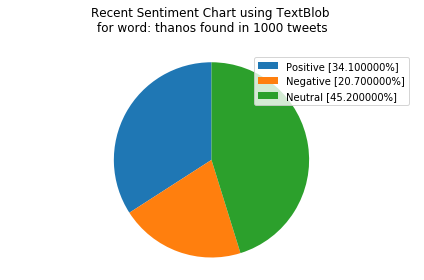

In [7]:
#show graph with textblob        
print(positive, negative, neutral, polarity)

perPositive = format(percent(positive, int(df.shape[0])),'02f')
perNegative = format(percent(negative, int(df.shape[0])),'02f')
perNeutral = format(percent(neutral, int(df.shape[0])),'02f')

sizes = [perPositive, perNegative, perNeutral]
labels = ['Positive [' + str(perPositive) + '%]','Negative [' + str(perNegative) + '%]','Neutral [' + str(perNeutral) + '%]']
p, t = plt.pie(sizes, startangle=90)
plt.title("Recent Sentiment Chart using TextBlob \nfor word: "+keyword+" found in "+str(int(df.shape[0]))+ " tweets\n")
plt.axis("equal")
plt.legend(p, labels,loc="best")
plt.tight_layout()
plt.show